Warming Up Exercises - Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:

Complete all following Task:

• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [41]:
import pandas as pd

In [42]:
import pandas as pd

# Task 1: Load the provided dataset and import in pandas DataFrame.
df=pd.read_csv("/content/drive/MyDrive/5CS037 - Concepts and Technologies of AI/Workshop2/bank .csv")
# df.head()

# Task 2: Check info of the DataFrame and identify specified details
# (a) Columns with dtype=object
dtypeObject_columns = df.select_dtypes(include='object').columns.tolist()

# (b) Unique values for columns with dtype=object
unique_values = {col: df[col].unique() for col in dtypeObject_columns}

# (c) Check for the total number of null values in each column
null_values = df.isnull().sum()

print("Columns with dtype=object:", dtypeObject_columns,"\n")
print("Unique values in object columns:", unique_values,"\n")
print("Null values in each column:", null_values,"\n")

# Task 3: Drop all the columns with dtypes object and store in new DataFrame,
#also write the DataFrame in ”.csv” with name ”banknumericdata.csv”
numeric_df = df.drop(columns=dtypeObject_columns)


numeric_file_path = '/content/drive/MyDrive/5CS037 - Concepts and Technologies of AI/Workshop2/banknumericdata.csv'
numeric_df.to_csv(numeric_file_path, index=False)

# Task 4: Read 'banknumericdata.csv' and find the summary statistics
numeric_df_reloaded = pd.read_csv(numeric_file_path)
summary_statistics = numeric_df_reloaded.describe()

# Print summary statistics
print("Summary Statistics:\n", summary_statistics)


Columns with dtype=object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'] 

Unique values in object columns: {'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object), 'marital': array(['married', 'single', 'divorced'], dtype=object), 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object), 'default': array(['no', 'yes'], dtype=object), 'housing': array(['yes', 'no'], dtype=object), 'loan': array(['no', 'yes'], dtype=object), 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object), 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object), 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object), 'y': array(['no', 'yes'], dtype=object)} 

Null values in each column: age    

Problem 2 - Data Imputations:

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"

1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [43]:
import pandas as pd

# Task 1: Load the provided dataset and import in pandas DataFrame.
file_path = '/content/drive/MyDrive/5CS037 - Concepts and Technologies of AI/Workshop2/medical_students_dataset.csv'
medical_students_df = pd.read_csv(file_path)

# Task 2: Check info of the DataFrame and identify column with missing (null) values.
missing_info = medical_students_df.isnull().sum()
total_rows = len(medical_students_df)
missing_summary = pd.DataFrame({
    'Missing Values': missing_info,
    'Percentage': (missing_info / total_rows) * 100
}).sort_values(by='Missing Values', ascending=False)
print("Missing Values Summary:\n", missing_summary)

# Task 3: For the column with missing values fill the values using various techniques we discussed above.
numeric_columns = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
for column in numeric_columns:
    if medical_students_df[column].skew() < 1:
        medical_students_df[column] = medical_students_df[column].fillna(medical_students_df[column].mean())
    else:
        medical_students_df[column] = medical_students_df[column].fillna(medical_students_df[column].median())

categorical_columns = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
for column in categorical_columns:
    medical_students_df[column] = medical_students_df[column].fillna(medical_students_df[column].mode()[0])

medical_students_df['Student ID'] = medical_students_df['Student ID'].fillna(-1)

# Task 4: Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
# {Hint: dataset.duplicated.sum()}
duplicate_count = medical_students_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

medical_students_df.drop_duplicates(inplace=True)


duplicate_count_after = medical_students_df.duplicated().sum()
print(f"Duplicate rows after removal: {duplicate_count_after}")




Missing Values Summary:
                 Missing Values  Percentage
Student ID               20000        10.0
Age                      20000        10.0
Gender                   20000        10.0
Height                   20000        10.0
Weight                   20000        10.0
Blood Type               20000        10.0
BMI                      20000        10.0
Temperature              20000        10.0
Heart Rate               20000        10.0
Blood Pressure           20000        10.0
Cholesterol              20000        10.0
Diabetes                 20000        10.0
Smoking                  20000        10.0
Number of duplicate rows: 12572
Duplicate rows after removal: 0


Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Dataset Used: "titanic.csv"

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [44]:
import pandas as pd

file_path = '/content/drive/MyDrive/5CS037 - Concepts and Technologies of AI/Workshop2/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

subset_data = titanic_data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_data = subset_data[subset_data['Pclass'] == 1]

fare_mean = first_class_data['Fare'].mean()
fare_median = first_class_data['Fare'].median()
fare_max = first_class_data['Fare'].max()
fare_min = first_class_data['Fare'].min()

print(f"Fare Mean: {fare_mean}")
print(f"Fare Median: {fare_median}")
print(f"Fare Maximum: {fare_max}")
print(f"Fare Minimum: {fare_min}")


Fare Mean: 84.1546875
Fare Median: 60.287499999999994
Fare Maximum: 512.3292
Fare Minimum: 0.0


Problem - 2:

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [45]:
null_age_count = subset_data['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_age_count}")

subset_data_cleaned = subset_data.dropna(subset=['Age'])
print(f"Number of rows after dropping null values: {len(subset_data_cleaned)}")




Number of null values in 'Age': 177
Number of rows after dropping null values: 714


Problem - 3:


The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:


• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:

1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [46]:
embarked_dummies = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')

titanic_data = pd.concat([titanic_data, embarked_dummies], axis=1)

titanic_data.drop(columns=['Embarked'], inplace=True)

titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:


Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


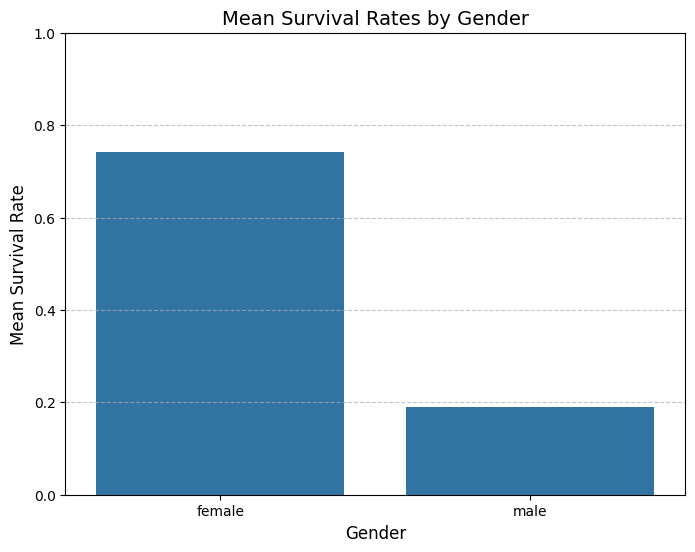

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mean_survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()
print(mean_survival_by_gender)

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values)
plt.title('Mean Survival Rates by Gender', fontsize=14)
plt.ylabel('Mean Survival Rate', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




Problem - 5:


Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<Figure size 1200x800 with 0 Axes>

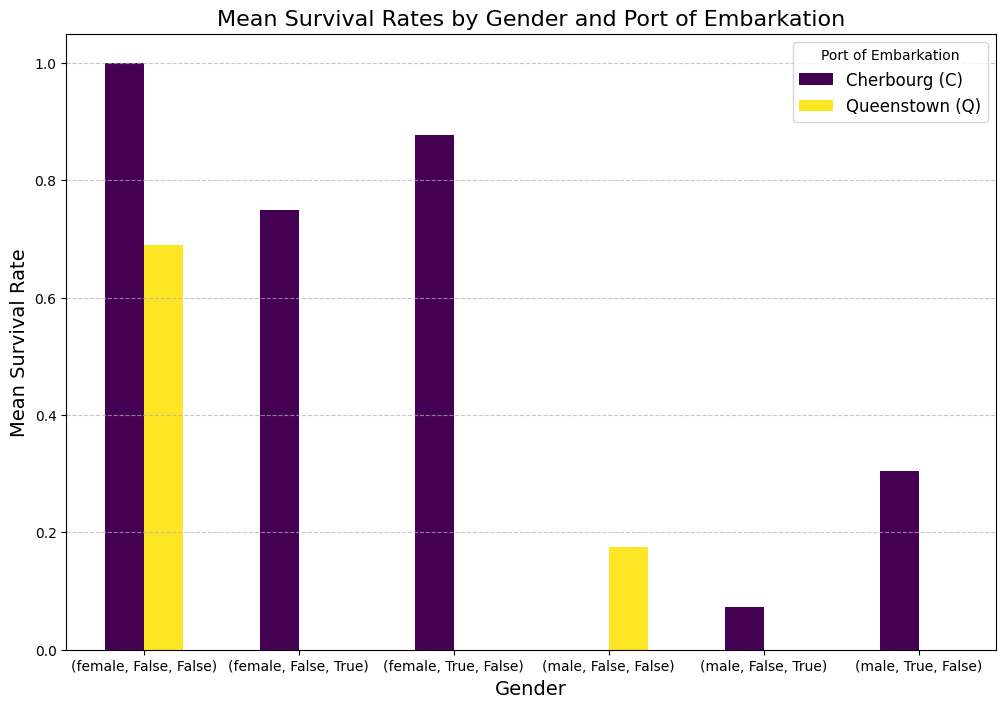

In [52]:

mean_survival_by_gender_embarked = titanic_data.groupby(['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])['Survived'].mean().unstack()
plt.figure(figsize=(12, 8))
mean_survival_by_gender_embarked.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='viridis')
plt.title('Mean Survival Rates by Gender and Port of Embarkation', fontsize=16)
plt.ylabel('Mean Survival Rate', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.xticks(rotation=0)
plt.legend(['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'], title='Port of Embarkation', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Problem - 6{Optional}:

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<Figure size 1200x800 with 0 Axes>

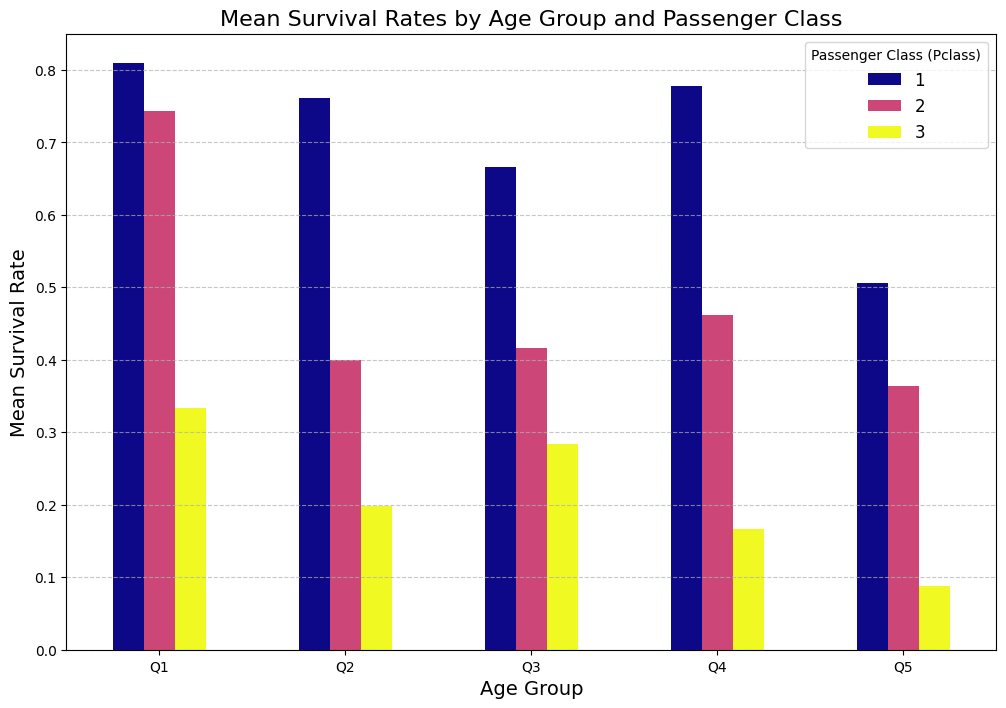

In [61]:
titanic_data['Age_Group'] = pd.qcut(titanic_data['Age'].dropna(), q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
mean_survival_by_age_class = titanic_data.groupby(['Age_Group', 'Pclass'], observed=False)['Survived'].mean().unstack()

plt.figure(figsize=(12, 8))
mean_survival_by_age_class.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='plasma')

plt.title('Mean Survival Rates by Age Group and Passenger Class', fontsize=16)
plt.ylabel('Mean Survival Rate', fontsize=14)
plt.xlabel('Age Group', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Passenger Class (Pclass)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

